In [ ]:

#TASK - 1.Give input image to model n it ahould predict it
#2.improve accuracy
#3.Accuracy val accuracy plots , Loss plots
#Experiment with depths
!pip install numpy

  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install keras tensorflow


  Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached ml_dtypes-0.5.3-cp310-cp310-win_amd64.whl (206 kB)
  Using cached rich-14.2.0-py3-none-any.whl (243 kB)
  Using cached optree-0.17.0-cp310-cp310-win_amd64.whl (304 kB)
  Using cached namex-0.1.0-py3-none-any.whl (5.9 kB)
  Using cached h5py-3.15.1-cp310-cp310-win_amd64.whl (2.9 MB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl (30 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached grpcio-1.76.0-cp310-cp310-win_amd64.whl (4.7 MB)
  Using cached termcolor-3.2.0-py3-none-any.whl (7.7 kB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached protobuf-6.33.0-cp310-abi3-win_amd64.whl (436 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.7-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached fonttools-4.60.1-cp310-cp310-win_amd64.whl (2.3 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Normalize 

In [6]:
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


to_categorical

In [7]:
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)

before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Architecture

In [8]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer

d:\ASSIGNMENT\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1630 - loss: 2.5064 - val_accuracy: 0.1753 - val_loss: 2.0943
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1708 - loss: 2.1017 - val_accuracy: 0.1702 - val_loss: 2.1208
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1715 - loss: 2.0987 - val_accuracy: 0.1853 - val_loss: 2.0973
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1752 - loss: 2.0948 - val_accuracy: 0.1794 - val_loss: 2.1082
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1743 - loss: 2.0878 - val_accuracy: 0.1720 - val_loss: 2.0769
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1756 - loss: 2.0838 - val_accuracy: 0.1796 - val_loss: 2.0915
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1761 - loss: 2.0808 - val_accuracy: 0.1794 - val_loss: 2.0871
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1763 - loss: 2.0798 - val_accuracy: 0.

In [11]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1676 - loss: 2.0570
test loss:2.0569698810577393
test accuracy:0.16760000586509705
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.16302500665187836, 0.17077499628067017, 0.17145000398159027, 0.1751749962568283, 0.17434999346733093, 0.1756249964237213, 0.17607499659061432, 0.17630000412464142, 0.1733749955892563, 0.17692500352859497], [2.506403923034668, 2.1016809940338135, 2.098726511001587, 2.0948376655578613, 2.0878281593322754, 2.083789348602295, 2.080798625946045, 2.079847574234009, 2.081282138824463, 2.0779666900634766], [0.1753000020980835, 0.17020000517368317, 0.18529999256134033, 0.1793999969959259, 0.1720000058412552, 0.17960000038146973, 0.1793999969959259, 0.17219999432563782, 0.18479999899864197, 0.16830000281333923], [2.09427547454834, 2.120788812637329, 2.097254514694214, 2.1082098484039307, 2.0768518447875977, 2.0915262699127197, 2.0871083736419678, 2.099137783050537, 2.0714800357818604, 

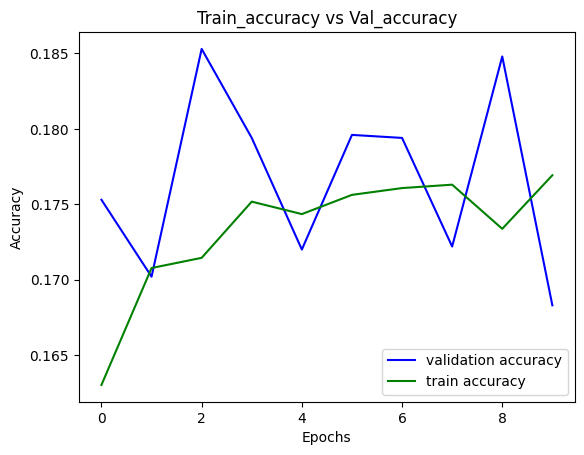

In [12]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

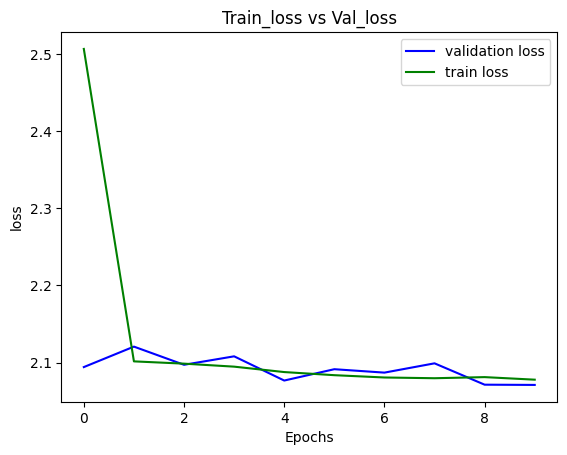

In [13]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [14]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [15]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1764 - loss: 2.7429 - val_accuracy: 0.1747 - val_loss: 2.1057
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1854 - loss: 2.0678 - val_accuracy: 0.1867 - val_loss: 2.0576
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1839 - loss: 2.0636 - val_accuracy: 0.1831 - val_loss: 2.0743
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1835 - loss: 2.0617 - val_accuracy: 0.1838 - val_loss: 2.0615
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1817 - loss: 2.0593 - val_accuracy: 0.1868 - val_loss: 2.0646
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1808 - loss: 2.0545 - val_accuracy: 0.1767 - val_loss: 2.0718
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1810 - loss: 2.0641 - val_accuracy: 0.1923 - val_loss: 2.0554
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1833 - loss: 2.0572 - val_accuracy: 0.

In [17]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1889 - loss: 2.0364
test loss:2.0363826751708984
test accuracy:0.18889999389648438


In [18]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2690 - loss: 2.1036 - val_accuracy: 0.3191 - val_loss: 1.8801
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3191 - loss: 1.8695 - val_accuracy: 0.3227 - val_loss: 1.8472
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3295 - loss: 1.8419 - val_accuracy: 0.3239 - val_loss: 1.8475
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3377 - loss: 1.8243 - val_accuracy: 0.3278 - val_loss: 1.8756
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3354 - loss: 1.8242 - val_accuracy: 0.3261 - val_loss: 1.8615
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3435 - loss: 1.8129 - val_accuracy: 0.3184 - val_loss: 1.8941
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3482 - loss: 1.8052 - val_accuracy: 0.3655 - val_loss: 1.7839
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3424 - loss: 1.8120 - val_accuracy: 0.

In [19]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3368 - loss: 1.8259
test loss:1.825853705406189
test accuracy:0.3368000090122223


In [20]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2204 - loss: 2.0685 - val_accuracy: 0.2689 - val_loss: 1.9460
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2659 - loss: 1.9358 - val_accuracy: 0.2655 - val_loss: 1.9543
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2868 - loss: 1.8902 - val_accuracy: 0.2856 - val_loss: 1.8789
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2979 - loss: 1.8772 - val_accuracy: 0.3010 - val_loss: 1.8796
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2981 - loss: 1.8605 - val_accuracy: 0.3105 - val_loss: 1.8368
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3104 - loss: 1.8438 - val_accuracy: 0.3054 - val_loss: 1.8529
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3070 - loss: 1.8413 - val_accuracy: 0.2863 - val_loss: 1.9360
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3152 - loss: 1.8310 - val_accuracy: 0.

In [21]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3220 - loss: 1.8096
test loss:1.8095623254776
test accuracy:0.32199999690055847


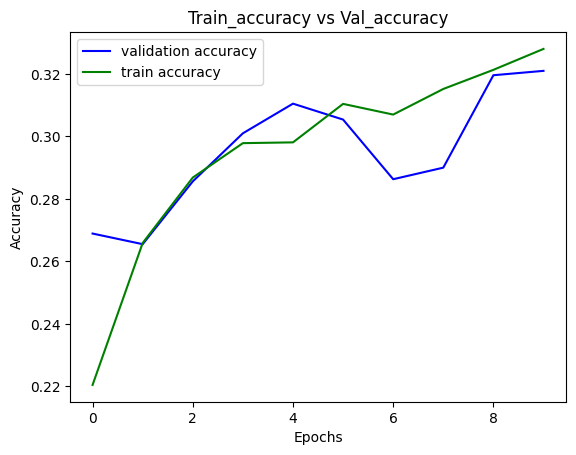

In [22]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
#SGD
#adam
#rmsprop

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image(image_path, model):
    """
    Predict the class of an input image using the trained model
    
    Args:
        image_path: Path to the image file
        model: Trained Keras model
    
    Returns:
        Predicted class name and confidence
    """
    # Load and preprocess the image
    img = Image.open(image_path)
    
    # Resize to 32x32 (CIFAR-10 input size)
    img = img.resize((32, 32))
    
    # Convert to numpy array and normalize
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    
    # If image is grayscale, convert to RGB
    if len(img_array.shape) == 2:
        img_array = np.stack([img_array]*3, axis=-1)
    # If image has alpha channel, remove it
    elif img_array.shape[2] == 4:
        img_array = img_array[:, :, :3]
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[predicted_class]} ({confidence:.2f})')
    plt.axis('off')
    plt.show()
    
    return class_names[predicted_class], confidence

# Example usage - you need to provide actual values:
# Replace 'path_to_your_image.jpg' with actual image path
# Replace 'model' with your trained model (model or model_3)

# For example, if you want to test with one of your trained models:
# predicted_class, confidence = predict_image('your_image.jpg', model_3)
# print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


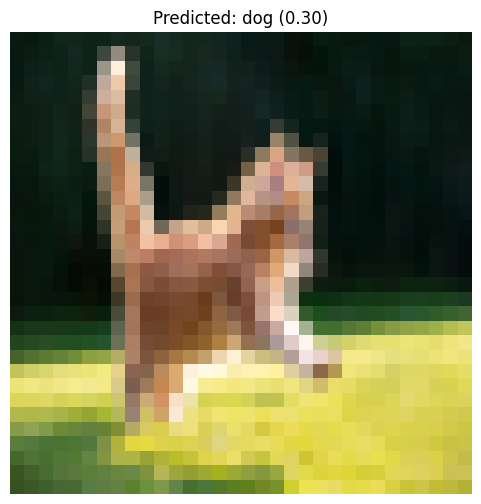

🎯 Predicted class: dog
📊 Confidence: 0.3049


In [27]:
image_path = "image.png"
predicted_class, confidence = predict_image(image_path, model_3)
print(f"🎯 Predicted class: {predicted_class}")
print(f"📊 Confidence: {confidence:.4f}")